In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

import itertools

# “Common Interest”: Two users who commented on the same article

In [2]:
postings_1 = pd.read_csv('data/Postings_01052019_15052019.csv', sep=';')
postings_2 = pd.read_csv('data/Postings_16052019_31052019.csv', sep=';')
postings = pd.concat([postings_1,postings_2])
postings['PostingCreatedAt'] = postings.PostingCreatedAt.astype('datetime64')
postings['ArticlePublishingDate'] = postings.ArticlePublishingDate.astype('datetime64')
postings['UserCreatedAt'] = postings.UserCreatedAt.astype('datetime64')
postings.head()

ID_Posting  ID_Posting_Parent  ID_CommunityIdentity  \
0  1041073586       1.041073e+09                671476   
1  1041073839       1.041073e+09                566938   
2  1041073872       1.041069e+09                669286   
3  1041080734       1.041080e+09                671476   
4  1041080828                NaN                671476   

                                     PostingHeadline  \
0  Das hat gestern bereits der Voggenhuber angefü...   
1                                                NaN   
2                                                NaN   
3                  Sie haben doch nichts gefordert??   
4  Heute wäre der perfekte Tag für die SPÖ gewese...   

                                      PostingComment        PostingCreatedAt  \
0  schieder hatte dem inhaltlich nichts entgegenz... 2019-05-01 18:21:15.127   
1     ...und meinen Bezirk bekommst du als Erbe mit. 2019-05-01 18:28:22.040   
2  Nein, bei der ÖVP/FPÖ genauso passiert. Ich wo... 2019-05-01 18:29:05.533   
3  sie haben nur die regierung kritisiert. das di... 2019-05-01 22:37:56.010   
4  ihr noch nicht erfülltes versprechen, den silb... 2019-05-01 22:42:06.310   

      ID_Article   ArticlePublishingDate  \
0  2000102330973 2019-05-01 10:28:57.490   
1  2000102330973 2019-05-01 10:28:57.490   
2  2000102330973 2019-05-01 10:28:57.490   
3  2000102330973 2019-05-01 10:28:57.490   
4  2000102330973 2019-05-01 10:28:57.490   

                                        ArticleTitle ArticleChannel  \
0  1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
1  1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
2  1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
3  1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
4  1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   

  ArticleRessortName UserCommunityName UserGender           UserCreatedAt  
0           Parteien       Ravenspower        NaN 2018-04-14 13:42:28.470  
1           Parteien        AlphaRomeo          m 2015-08-28 17:07:41.110  
2           Parteien        Hpolditsch        NaN 2018-03-06 20:03:42.737  
3           Parteien       Ravenspower        NaN 2018-04-14 13:42:28.470  
4           Parteien       Ravenspower        NaN 2018-04-14 13:42:28.470

In [3]:
df = postings[["ID_CommunityIdentity","ID_Article","PostingCreatedAt" ]]

In [4]:



    
df_day = df[(df.PostingCreatedAt >= '2019-05-01') & 
                   (df.PostingCreatedAt < '2019-05-02')].merge(df, 
                    on = 'ID_Article', suffixes = ['_1', '_2'], how = 'inner')

    
    



In [5]:
df_day

ID_CommunityIdentity_1     ID_Article      PostingCreatedAt_1  \
0                         671476  2000102330973 2019-05-01 18:21:15.127   
1                         671476  2000102330973 2019-05-01 18:21:15.127   
2                         671476  2000102330973 2019-05-01 18:21:15.127   
3                         671476  2000102330973 2019-05-01 18:21:15.127   
4                         671476  2000102330973 2019-05-01 18:21:15.127   
...                          ...            ...                     ...   
11091472                  521233  2000102343465 2019-05-01 16:08:32.433   
11091473                  569851  2000102328952 2019-05-01 09:41:40.823   
11091474                  552291  2000102344557 2019-05-01 19:07:22.583   
11091475                   43273  2000102326946 2019-05-01 10:12:55.820   
11091476                   43273  2000102326946 2019-05-01 10:12:55.820   

          ID_CommunityIdentity_2      PostingCreatedAt_2  
0                         671476 2019-05-01 18:21:15.127  
1                         566938 2019-05-01 18:28:22.040  
2                         669286 2019-05-01 18:29:05.533  
3                         671476 2019-05-01 22:37:56.010  
4                         671476 2019-05-01 22:42:06.310  
...                          ...                     ...  
11091472                  521233 2019-05-01 16:08:32.433  
11091473                  569851 2019-05-01 09:41:40.823  
11091474                  552291 2019-05-01 19:07:22.583  
11091475                   43273 2019-05-01 10:12:55.820  
11091476                  243516 2019-05-03 11:51:54.683  

[11091477 rows x 5 columns]

In [18]:
df_day = df_day[["ID_CommunityIdentity_1","ID_CommunityIdentity_2","ID_Article"]]

In [19]:
edges = df_day[["ID_CommunityIdentity_1","ID_CommunityIdentity_2","ID_Article"]].groupby(
            ["ID_CommunityIdentity_1","ID_CommunityIdentity_2"]).count()

In [20]:
edges
edges.reset_index(inplace = True)
edges.rename(columns = {'ID_CommunityIdentity_1': 'source', 'ID_CommunityIdentity_2': 'target',
                        'ID_Article': 'weight'}, inplace = True)
edges
 


source  target  weight
0           364     364       1
1           364    4577       1
2           364    7733       1
3           364   11810       1
4           364   17942       1
...         ...     ...     ...
1476718  691682  673732       1
1476719  691682  686065       1
1476720  691682  689861       1
1476721  691682  691668       2
1476722  691682  691682       1

[1476723 rows x 3 columns]

Filtering, by taking wieght greater than 50

In [27]:
edges = edges[edges.weight > 50]
edges = edges[edges.source != edges.target]

In [28]:
edges

source  target  weight
838         932   45168      93
867         932   59327     112
1021        932  169493      80
1069        932  186971      98
1183        932  248535      60
...         ...     ...     ...
1475997  691676  633859      58
1476093  691676  671476     126
1476163  691676  687628     100
1476359  691677  186971      98
1476415  691677  248535      60

[31461 rows x 3 columns]

In [29]:
edges.to_csv("data/vote_to_edges_day_1.csv", index=False)

In [30]:
edges_day_1 = pd.read_csv("data/vote_to_edges_day_1.csv")

In [31]:
G_day_1 = nx.from_pandas_edgelist(edges_day_1, edge_attr = 'weight', create_using=nx.DiGraph())
G_day_1_undirected = nx.from_pandas_edgelist(edges_day_1, edge_attr = 'weight', create_using=nx.Graph())

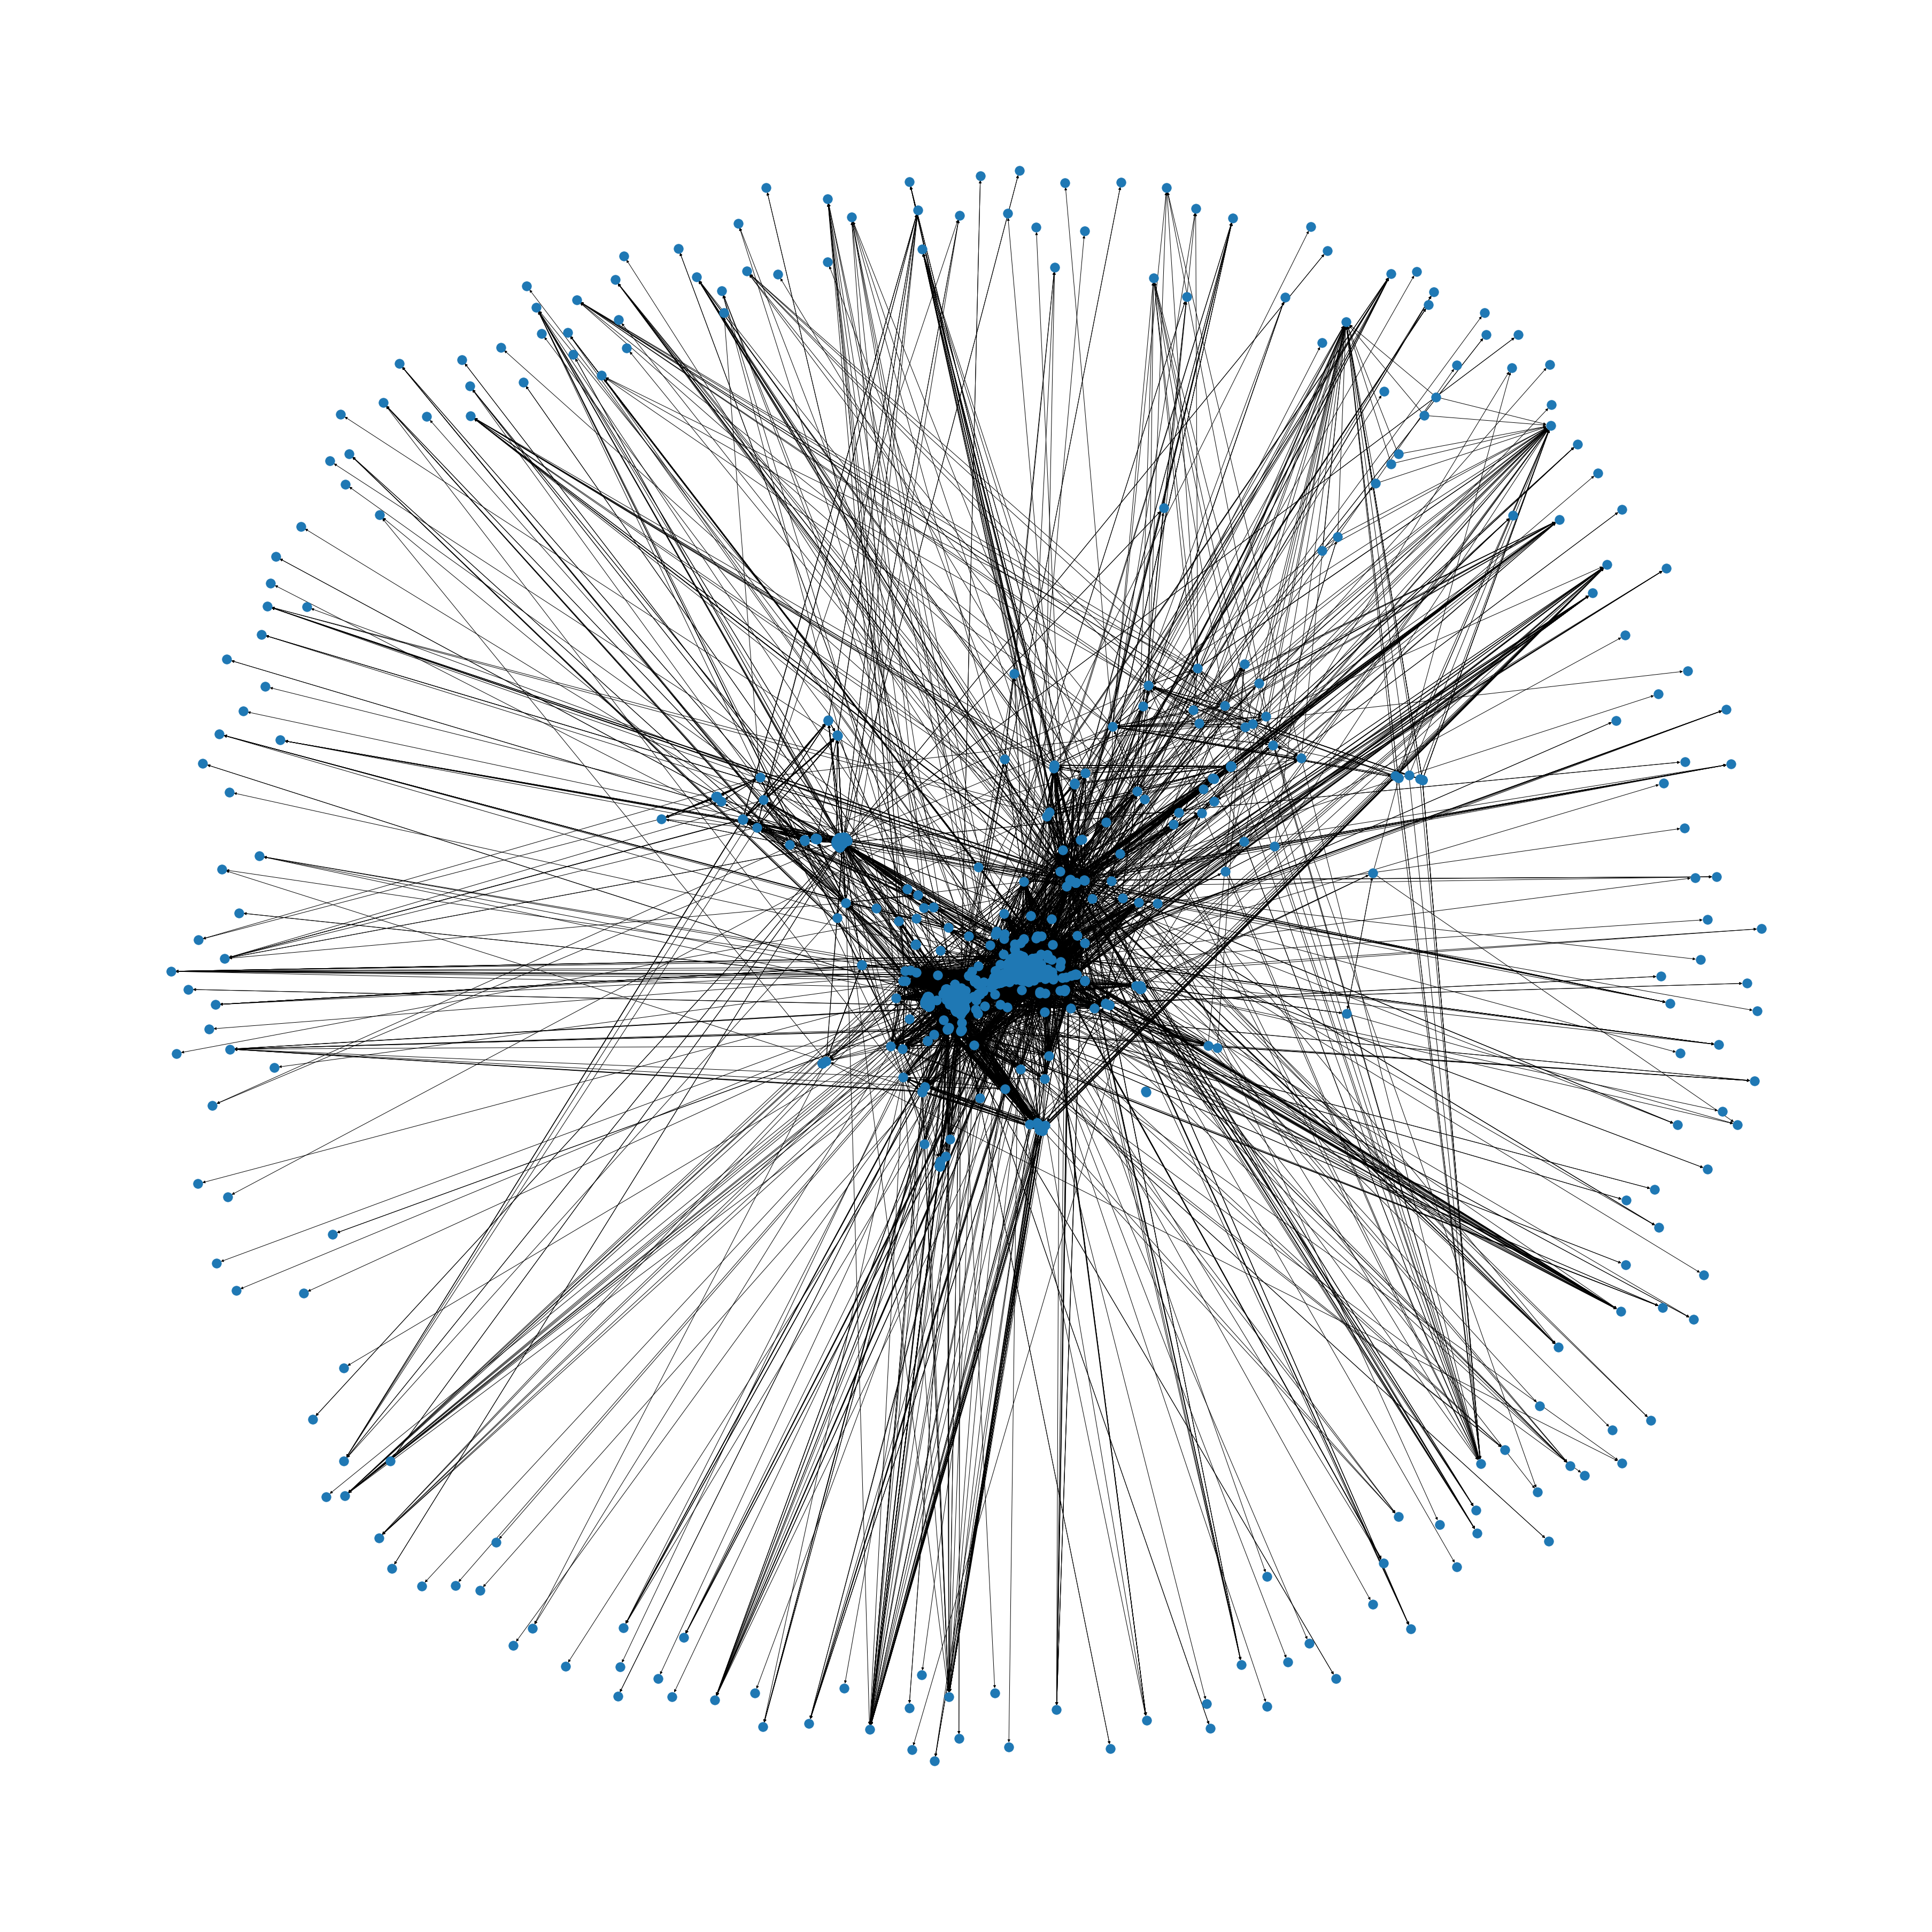

In [32]:
fig = plt.figure(figsize=(50,50))
nx.draw_spring(G_day_1)
plt.show()

In [33]:
print(nx.info(G_day_1))

DiGraph with 1653 nodes and 31461 edges


In [34]:
nodes = sorted(G_day_1.nodes)
k = len(nodes)
#k = 100

# Jaccard coefficient
jac = nx.jaccard_coefficient(G_day_1_undirected, [(i,j) for i,j in itertools.product(nodes[:k], nodes[:k]) 
                                                  if i!=j])
jac_df = pd.DataFrame(list(jac), columns = ['source', 'target', 'jaccard_coef'])

In [35]:
jac_df

source  target  jaccard_coef
0           932    1437      0.083333
1           932    1493      0.025157
2           932    2148      0.000000
3           932    2809      0.083333
4           932    2968      0.013746
...         ...     ...           ...
2730751  691677  691664      0.111111
2730752  691677  691667      0.047619
2730753  691677  691668      0.400000
2730754  691677  691672      0.000000
2730755  691677  691676      0.000000

[2730756 rows x 3 columns]

In [36]:
# Adamic and Adar index
ad_ad = nx.adamic_adar_index(G_day_1_undirected, [(i,j) for i,j in itertools.product(nodes[:k], nodes[:k]) 
                                                  if i!=j])
ad_ad_df = pd.DataFrame(list(ad_ad), columns = ['source', 'target', 'adamic_adar_index'])

In [37]:
# Preferential attachment
pref_att = nx.preferential_attachment(G_day_1_undirected, [(i,j) for i,j in itertools.product(nodes[:k], 
                                                            nodes[:k]) if i!=j])
pref_att_df = pd.DataFrame(list(pref_att), columns = ['source', 'target', 'preferential_attachment_index'])

In [38]:
# Clustering coefficient score
cluster_dict = nx.clustering(G_day_1)
ccs = [(i, j, (cluster_dict[i]*cluster_dict[j])) for i,j in itertools.product(nodes[:k], nodes[:k]) if i!=j]
ccs_df = pd.DataFrame(list(ccs), columns = ['source', 'target', 'clustering_coefficient_score'])

In [39]:
# Weight (= target attribute) 
weight = [(n1, n2, G_day_1.edges[n1,n2]['weight']) if (n1,n2) in G_day_1.edges else (n1, n2, 0) 
          for n1 in nodes[:k] for n2 in nodes[:k]]
weight_df = pd.DataFrame(weight, columns = ['source', 'target', 'weight'])

input_df_day_1 = jac_df.merge(ad_ad_df)
input_df_day_1 = input_df_day_1.merge(pref_att_df)
input_df_day_1 = input_df_day_1.merge(ccs_df)
input_df_day_1 = input_df_day_1.merge(weight_df)
input_df_day_1

source  target  jaccard_coef  adamic_adar_index  \
0           932    1437      0.083333           0.175118   
1           932    1493      0.025157           0.707115   
2           932    2148      0.000000           0.000000   
3           932    2809      0.083333           0.337140   
4           932    2968      0.013746           0.707115   
...         ...     ...           ...                ...   
2730751  691677  691664      0.111111           0.337140   
2730752  691677  691667      0.047619           0.337140   
2730753  691677  691668      0.400000           0.337140   
2730754  691677  691672      0.000000           0.000000   
2730755  691677  691676      0.000000           0.000000   

         preferential_attachment_index  clustering_coefficient_score  weight  
0                                   12                      0.000000       0  
1                                 1812                      0.477056       0  
2                                  144                      0.303524       0  
3                                  168                      0.539292       0  
4                                 3396                      0.226310       0  
...                                ...                           ...     ...  
2730751                             36                      0.896266       0  
2730752                             84                      0.878794       0  
2730753                             10                      0.210526       0  
2730754                             22                      0.746154       0  
2730755                             16                      1.000000       0  

[2730756 rows x 7 columns]

In [40]:
input_df_day_1[input_df_day_1.weight != 0]

source  target  jaccard_coef  adamic_adar_index  \
110         932   45168      0.687500           3.328796   
154         932   59327      0.026144           1.743112   
354         932  169493      0.076923           0.369269   
429         932  186971      0.010390           0.952156   
601         932  248535      0.010390           0.952156   
...         ...     ...           ...                ...   
2728728  691676  633859      0.016471           1.139971   
2728884  691676  671476      0.009103           1.154751   
2729019  691676  687628      0.016279           1.140291   
2729534  691677  186971      0.002646           0.168570   
2729706  691677  248535      0.002646           0.168570   

         preferential_attachment_index  clustering_coefficient_score  weight  
110                                180                      0.423674      93  
154                               3624                      0.081287     112  
354                                 24                      0.355442      80  
429                               4524                      0.013406      98  
601                               4524                      0.013406      60  
...                                ...                           ...     ...  
2728728                           3392                      0.134585      58  
2728884                           6144                      0.041533     126  
2729019                           3432                      0.133003     100  
2729534                            754                      0.018858      98  
2729706                            754                      0.018858      60  

[31461 rows x 7 columns]